### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 9
1. Abalone Data Set
2. Название файла: abalone.data
3. Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone
4. Класс: Sex (столбец No 0)
5. Зависимая переменная: Diameter (столбец No 3)
6. Метод обработки пропущенных значений – среднее значение класса
7. Метод обработки выбросов – алгоритм кластеризации DBSCAN
8. Метод снижения размерности данных – линейная регрессия (LinearRegression)
9. Регрессоры:
* Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5
* регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5
* регрессия на основе деревьев решений (DecisionTreeRegressor), параметр max_leaf_nodes в диапазоне от 5 до 10
10. Показатели качества регрессии:
* Для определения лучшего регрессора MAE
* Для визуализации кривой обучения MedAE










In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).



In [ ]:
import pandas as pd

# Задаем путь к файлу
path = '/content/drive/MyDrive/viti 4/Data mining/Lab 7/abalone.data'

# Определяем названия столбцов в соответствии с описанием данных из UCI репозитория
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Rings']

# Читаем набор данных и загружаем его в DataFrame
df = pd.read_csv(path, header=None, names=columns)

# Выводим первые несколько строк набора данных, чтобы убедиться, что он загружен корректно
print(df.head())

# Разделяем столбец меток классов (Sex) и зависимую переменную (Diameter)
class_feature = df['Sex']
dependent_feature = df['Diameter']

# Выводим метки классов и зависимую переменную
print(f"Метки классов (Sex):\n{class_feature.head()}")
print(f"Зависимая переменная (Diameter):\n{dependent_feature.head()}")


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
Метки классов (Sex):
0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object
Зависимая переменная (Diameter):
0    0.365
1    0.265
2    0.420
3    0.365
4    0.255
Name: Diameter, dtype: float64


###2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.




In [ ]:
# Преобразуем категориальный признак 'Sex' в числовой
# Заменим: 'M' (Male) -> 0, 'F' (Female) -> 1, 'I' (Infant) -> 2
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

# Проверим на наличие пропущенных значений
missing_value = df.isnull().sum()
print(f"Пропущенные значения в каждом столбце:\n{missing_value}")

# Удалим записи с пропущенными значениями
data_frame_delete = df.dropna()

# Оставим только числовые признаки
numeric_df = data_frame_delete .select_dtypes(include=['float64', 'int64'])

# Выводим первые несколько строк нового набора данных с только числовыми признаками
print(numeric_df.head())

Пропущенные значения в каждом столбце:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


###3.Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Преобразуем все числовые признаки в тип float
numeric_col = df.columns[1:]  # Все столбцы, кроме 'Sex'
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

# Проверим на наличие пропущенных значений
missing_value = df.isnull().sum()
print(f"Пропущенные значения в каждом столбце:\n{missing_value}")

if missing_value.sum() > 0:
    # Заменим пропущенные значения на среднее значение класса
    for col in numeric_col:
        mean_value = df.groupby('Sex')[col].mean()  # Средние значения для каждого класса
        df[col].fillna(mean_value[df['Sex']], inplace=True)  # Заменяем NaN на среднее значение класса
else:
    # Если пропущенные значения отсутствуют, определим и удалим выбросы с помощью DBSCAN
    # Нормализуем данные
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numeric_col])

    # Применим алгоритм DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Параметры можно настроить
    df['outlier'] = dbscan.fit_predict(X_scaled)

    # Удаляем выбросы (обозначенные как -1)
    data_frame_no_outliers = df[df['outlier'] != -1]

    # Печатаем информацию о точках до и после удаления выбросов
    print(f"Количество точек до удаления выбросов: {len(df)}")
    print(f"Количество точек после удаления выбросов: {len(data_frame_no_outliers)}")

Пропущенные значения в каждом столбце:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Количество точек до удаления выбросов: 4177
Количество точек после удаления выбросов: 3396


###4.Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
# Масштабируем числовые признаки на интервал [0, 1], исключая 'Sex' и 'Diameter'
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Sex', 'Diameter']))

# Создаем новый DataFrame с масштабированными признаками
scaled_data_frame = pd.DataFrame(scaled_features, columns=df.columns[1:-1])  # Пропускаем 'Sex' и 'Diameter'

# Проверяем, какие признаки имеют более 50 уникальных значений, исключая 'Diameter' и 'Sex'
valid_unique_features = scaled_data_frame.columns[scaled_data_frame.nunique() > 50].tolist()

# Удаляем 'Diameter' из списка, если он есть
if 'Diameter' in valid_unique_features:
    valid_unique_features.remove('Diameter')

# Удаляем 'Sex' из списка, если он есть
if 'Sex' in valid_unique_features:
    valid_unique_features.remove('Sex')

print(f"Признаки с более чем 50 уникальными значениями:\n{valid_unique_features}")

Признаки с более чем 50 уникальными значениями:
['Length', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight']


In [ ]:
# Используем Linear Regression для снижения размерности
if len(valid_unique_features) >= 3:
    # Подготовка данных
    X = scaled_data_frame[valid_unique_features]

    # Инициализация линейной регрессии
    model = LinearRegression()

    # Применение линейной регрессии (замените 'Rings' на нужную вам переменную, если требуется)
    model.fit(X, df['Diameter'])  # Пример использования 'Diameter' как зависимой переменной

    # Получаем коэффициенты регрессии и выбираем три наиболее значимые
    coef_regression = pd.Series(model.coef_, index=valid_unique_features)
    top_features = coef_regression.abs().nlargest(3).index.tolist()  # Топ 3 признака по абсолютному значению коэффициента

    print(f"Три самых значимых признака по линейной регрессии:\n{top_features}")

    # Создаем DataFrame из уменьшенных признаков
    reduced_data_frame = pd.DataFrame(X[top_features])
    reduced_data_frame['Sex'] = df['Sex'].reset_index(drop=True)  # Добавляем целевой класс

    # Выводим первые несколько строк итогового набора данных
    print("Три признака после снижения размерности:")
    print(reduced_data_frame.head())
else:
    print("Недостаточно признаков с более чем 50 уникальными значениями для снижения размерности.")

Три самых значимых признака по линейной регрессии:
['Length', 'Viscera weight', 'Height']
Три признака после снижения размерности:
     Length  Viscera weight    Height  Sex
0  0.513514        0.147982  0.181335    0
1  0.371622        0.068261  0.079157    0
2  0.614865        0.207773  0.239065    1
3  0.493243        0.152965  0.182044    0
4  0.344595        0.053313  0.071897    2


###5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

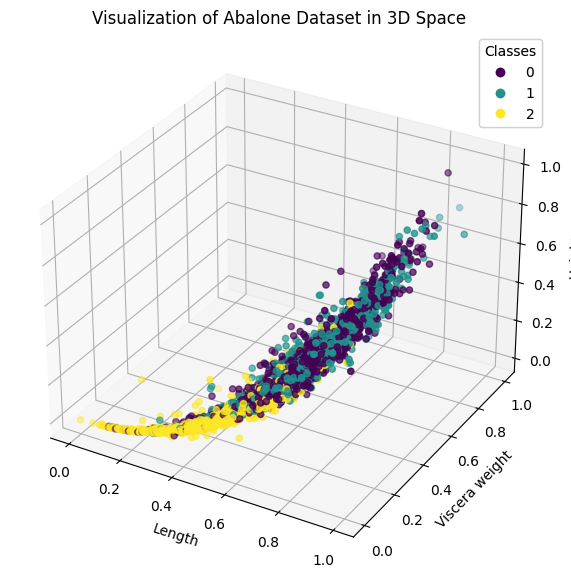

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Используем только три наиболее значимые признака для визуализации
if len(top_features) == 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Отображаем точки разных классов
    scatter = ax.scatter(reduced_data_frame[top_features[0]],
                         reduced_data_frame[top_features[1]],
                         reduced_data_frame[top_features[2]],
                         c=reduced_data_frame['Sex'],
                         cmap='viridis',
                         marker='o')

    # Настраиваем подписи осей
    ax.set_xlabel(top_features[0])
    ax.set_ylabel(top_features[1])
    ax.set_zlabel(top_features[2])

    # Устанавливаем название графика
    plt.title('Visualization of Abalone Dataset in 3D Space')

    # Создаем легенду
    legend_class = ax.legend(*scatter.legend_elements(), title="Classes", loc='upper right')
    ax.add_artist(legend_class)

    # Показываем график
    plt.show()
else:
    print("Недостаточно признаков для визуализации в 3D.")


###6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Разделение данных на признаки и целевую переменную
X = reduced_data_frame[top_features]
y = df['Diameter']

# Разделение набора данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Полиномиальная регрессия (PolynomialFeatures + LinearRegression)
polynomial_regression = Pipeline([
    ('poly', PolynomialFeatures()),  # Преобразуем признаки в полиномиальные
    ('linear', LinearRegression())   # Линейная регрессия
])

polynomial_grid_parameter = {
    'poly__degree': [2, 3, 4, 5]  # Подбор параметра degree в диапазоне от 2 до 5
}

polynomial_grid_search = GridSearchCV(polynomial_regression, polynomial_grid_parameter, cv=5, scoring='neg_mean_squared_error')
polynomial_grid_search.fit(X_train, y_train)

# Лучшая модель полиномиальной регрессии
polynomial_best_model = polynomial_grid_search.best_estimator_

# 2. ElasticNet регрессия
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Нормализация данных
    ('elastic', ElasticNet())      # ElasticNet регрессия
])

elastic_parameter_grid = {
    'elastic__alpha': np.linspace(0.5, 1.5, 5),     # Подбор параметра alpha в диапазоне от 0.5 до 1.5
    'elastic__l1_ratio': np.linspace(0.0, 1.0, 5)   # Подбор параметра l1_ratio в диапазоне от 0.5 до 1.0
}


elastic_grid_search = GridSearchCV(elastic_pipeline, elastic_parameter_grid, cv=5, scoring='neg_mean_squared_error')
elastic_grid_search.fit(X_train, y_train)

# Лучшая модель ElasticNet регрессии
best_elastic_model = elastic_grid_search.best_estimator_

# 3. Decision Tree Regressor
tree_parameter_grid = {
    'max_leaf_nodes': range(5, 11)  # Подбор параметра max_leaf_nodes в диапазоне от 5 до 10
}

tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_parameter_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid_search.fit(X_train, y_train)

# Лучшая модель Decision Tree регрессии
best_tree_model = tree_grid_search.best_estimator_

# Выводим параметры лучших моделей
print(f"Лучшие параметры для полиномиальной регрессии: {polynomial_grid_search.best_params_}")
print(f"Лучшие параметры для ElasticNet регрессии: {elastic_grid_search.best_params_}")
print(f"Лучшие параметры для Decision Tree регрессии: {tree_grid_search.best_params_}")

# Оценка моделей на тестовой выборке
polynomial_test_score = polynomial_best_model.score(X_test, y_test)
elastic_test_score = best_elastic_model.score(X_test, y_test)
tree_test_score = best_tree_model.score(X_test, y_test)

print(f"Точность полиномиальной регрессии на тестовой выборке: {polynomial_test_score}")
print(f"Точность ElasticNet регрессии на тестовой выборке: {elastic_test_score}")
print(f"Точность Decision Tree регрессии на тестовой выборке: {tree_test_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+00, tolerance: 2.634e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+00, tolerance: 2.588e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Лучшие параметры для полиномиальной регрессии: {'poly__degree': 4}
Лучшие параметры для ElasticNet регрессии: {'elastic__alpha': 0.5, 'elastic__l1_ratio': 0.0}
Лучшие параметры для Decision Tree регрессии: {'max_leaf_nodes': 10}
Точность полиномиальной регрессии на тестовой выборке: 0.9589442347651846
Точность ElasticNet регрессии на тестовой выборке: 0.9181424667932868
Точность Decision Tree регрессии на тестовой выборке: 0.9541613580459699


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


###7.Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+01, tolerance: 3.253e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+01, tolerance: 3.253e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

MAE для Полиномиальная регрессия (степень=4): 0.015857688509499115
MAE для ElasticNet (alpha=0.5, l1_ratio=0.0): 0.07655025980023035
MAE для Решающее дерево (max_leaf_nodes=10): 0.01921455119797341


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+01, tolerance: 3.253e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarn

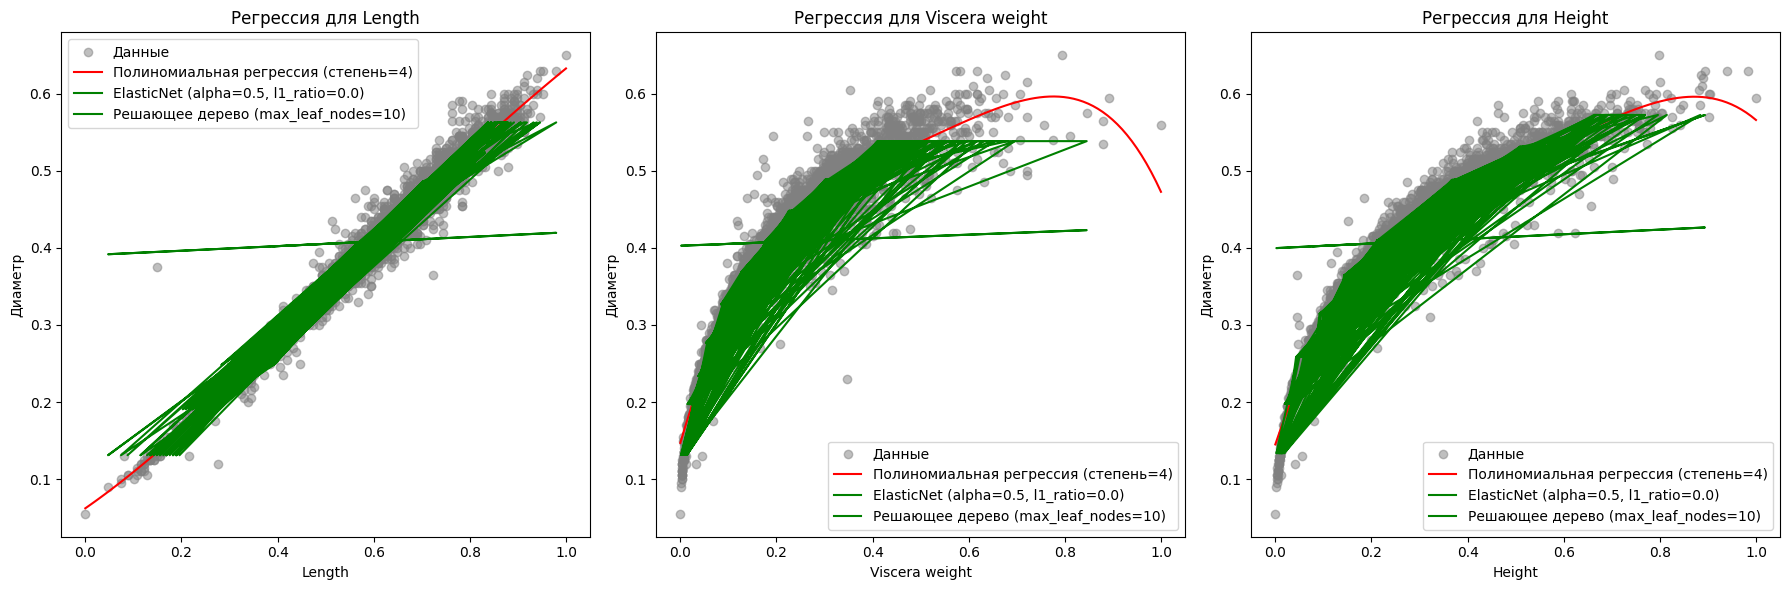

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Определение моделей с оптимальными параметрами
models = {
    'Полиномиальная регрессия (степень=4)': LinearRegression(),
    'ElasticNet (alpha=0.5, l1_ratio=0.0)': ElasticNet(alpha=0.5, l1_ratio=0.0),
    'Решающее дерево (max_leaf_nodes=10)': DecisionTreeRegressor(max_leaf_nodes=10)
}

# Для хранения значений MAE
mae_values = {}

# Сначала вычисляем MAE для каждой модели
for feature in X.columns:
    for name, model in models.items():
        if 'Полиномиальная' in name:
            poly = PolynomialFeatures(degree=4)
            X_poly_train = poly.fit_transform(X_train[[feature]])
            model.fit(X_poly_train, y_train)
            X_poly_test = poly.transform(X_test[[feature]])
            y_pred = model.predict(X_poly_test)
            mae = mean_absolute_error(y_test, y_pred)
            mae_values[name] = mae
        else:
            model.fit(X_train[[feature]], y_train)
            y_pred = model.predict(X_test[[feature]])
            mae = mean_absolute_error(y_test, y_pred)
            mae_values[name] = mae

# Печатаем MAE для каждой модели
for name, mae in mae_values.items():
    print(f'MAE для {name}: {mae}')

# Определяем модель с наименьшей MAE
best_model_name = min(mae_values, key=mae_values.get)

# Построение графика
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(X.columns):
    ax = axs[i]
    ax.scatter(X[feature], y, color='gray', alpha=0.5, label='Данные')

    # Подогнать каждую модель и построить линию регрессии
    for name, model in models.items():
        if 'Полиномиальная' in name:
            poly = PolynomialFeatures(degree=4)
            X_poly_train = poly.fit_transform(X_train[[feature]])
            model.fit(X_poly_train, y_train)
            X_poly_test = poly.transform(X_test[[feature]])
            y_pred = model.predict(X_poly_test)

            # Создать сетку для построения графика
            X_grid = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)
            X_grid_poly = poly.transform(X_grid)
            y_pred_grid = model.predict(X_grid_poly)

            # Определяем цвет линии
            color = 'red' if name == best_model_name else 'blue'
            ax.plot(X_grid, y_pred_grid, color=color, label=name)

        else:
            model.fit(X_train[[feature]], y_train)
            y_pred = model.predict(X_test[[feature]])

            # Определяем цвет линии
            color = 'red' if name == best_model_name else 'green'
            ax.plot(X_test[feature], y_pred, color=color, label=name)

    ax.set_xlabel(feature)
    ax.set_ylabel('Диаметр')  # Измените на название вашей переменной отклика, если необходимо
    ax.set_title(f'Регрессия для {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


###8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

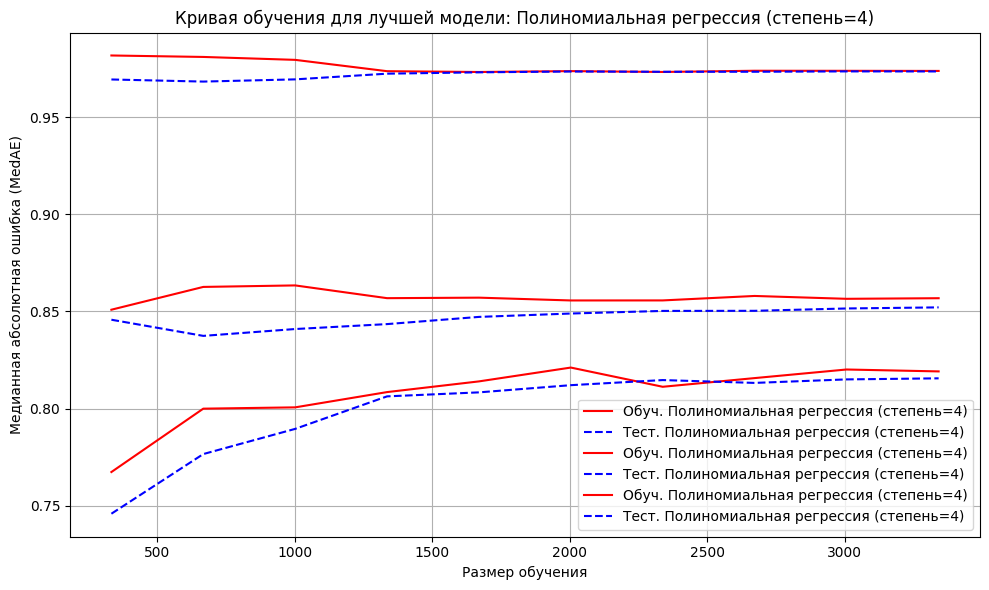

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Определение моделей с оптимальными параметрами
models = {
    'Полиномиальная регрессия (степень=4)': LinearRegression(),
    'ElasticNet (alpha=0.5, l1_ratio=0.0)': ElasticNet(alpha=0.5, l1_ratio=0.0),
    'Решающее дерево (max_leaf_nodes=10)': DecisionTreeRegressor(max_leaf_nodes=10)
}

# Определите наилучшую модель на основе предыдущих расчетов MAE.
best_model_name = min(mae_values, key=mae_values.get)  # Выберите модель с наименьшей MAE
best_model = models[best_model_name]

# График для кривых обучения
plt.figure(figsize=(10, 6))

for feature in X.columns:
    # Вычисление кривых обучения для лучшей модели
    train_sizes, train_scores, test_scores = learning_curve(best_model, X[[feature]], y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    # Рассчитайте медианные значения MAE для обучения и тестирования
    train_medae = np.median(train_scores, axis=1)
    test_medae = np.median(test_scores, axis=1)

    # Построение тренировочных и тестовых кривых
    plt.plot(train_sizes, train_medae, label=f'Обуч. {best_model_name}', color='red', linestyle='-')
    plt.plot(train_sizes, test_medae, label=f'Тест. {best_model_name}', color='blue', linestyle='--')

plt.title(f'Кривая обучения для лучшей модели: {best_model_name}')
plt.xlabel('Размер обучения')
plt.ylabel('Медианная абсолютная ошибка (MedAE)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
